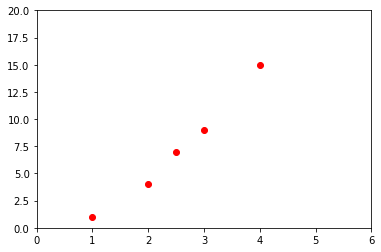

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.axis([0, 6, 0, 20])
plt.plot(x, y, 'ro')
plt.show()

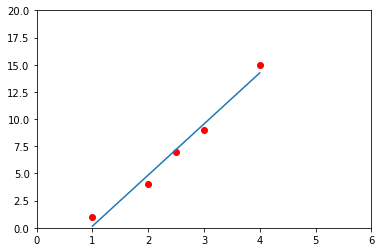

In [79]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [80]:
!pip install -q sklearn

In [81]:
%tensorflow_version 2.x 

In [82]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output # particular for this notebook
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

In [83]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [84]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [85]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [86]:
dftrain[['age','fare']]=StandardScaler().fit_transform(dftrain[['age','fare']])
dfeval[['age','fare']]=StandardScaler().fit_transform(dfeval[['age','fare']])

In [87]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,-0.610415,1,0,-0.497403,Third,unknown,Southampton,n
1,1,female,0.669397,1,0,0.676353,First,C,Cherbourg,n
2,1,female,-0.290462,0,0,-0.485030,Third,unknown,Southampton,y
3,1,female,0.429432,1,0,0.343046,First,C,Southampton,n
4,0,male,-0.130485,0,0,-0.475254,Third,unknown,Queenstown,y


In [88]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,0.444353,0,0,-0.543558,Third,unknown,Southampton,y
1,0,male,1.788943,0,0,0.711569,First,E,Southampton,y
2,1,female,2.072015,0,0,-0.013576,First,C,Southampton,y
3,1,female,1.859711,0,0,-0.315809,Second,unknown,Southampton,y
4,1,male,0.373585,0,0,-0.401752,Second,D,Southampton,y


In [89]:
dfeval.loc[0]

survived                        0
sex                          male
age                      0.444353
n_siblings_spouses              0
parch                           0
fare                    -0.543558
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object

In [90]:
dfeval.iloc[0]

survived                        0
sex                          male
age                      0.444353
n_siblings_spouses              0
parch                           0
fare                    -0.543558
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object

In [91]:
dfeval["sex"]

0        male
1        male
2      female
3      female
4        male
        ...  
259    female
260      male
261    female
262      male
263      male
Name: sex, Length: 264, dtype: object

In [92]:
y_train=dftrain.pop('survived')

y_eval=dfeval.pop('survived')

In [93]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,-0.610415,1,0,-0.497403,Third,unknown,Southampton,n
1,female,0.669397,1,0,0.676353,First,C,Cherbourg,n
2,female,-0.290462,0,0,-0.485030,Third,unknown,Southampton,y
3,female,0.429432,1,0,0.343046,First,C,Southampton,n
4,male,-0.130485,0,0,-0.475254,Third,unknown,Queenstown,y


In [94]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [95]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,6.270000e+02,627.000000,627.000000,6.270000e+02
mean,-1.419209e-16,0.545455,0.379585,-1.424521e-16
std,1.000798e+00,1.151090,0.792999,1.000798e+00
min,-2.310165e+00,0.000000,0.000000,-6.302982e-01
25%,-5.304267e-01,0.000000,0.000000,-4.855650e-01
50%,-1.304855e-01,0.000000,0.000000,-3.545026e-01
75%,4.294323e-01,1.000000,0.000000,-5.495269e-02
max,4.028904e+00,8.000000,5.000000,8.760902e+00


In [96]:
dftrain.shape

(627, 9)

In [97]:
dfeval.shape

(264, 9)

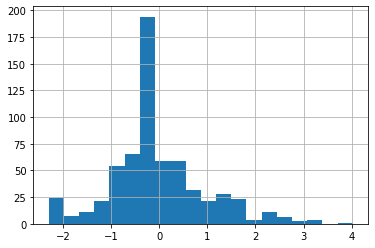

In [98]:
dftrain.age.hist(bins=20)
#Most passengers are in their 20's or 30's

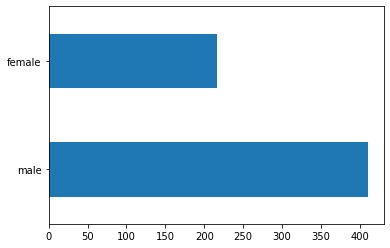

In [99]:
dftrain.sex.value_counts().plot(kind='barh')
# Most passengers are male

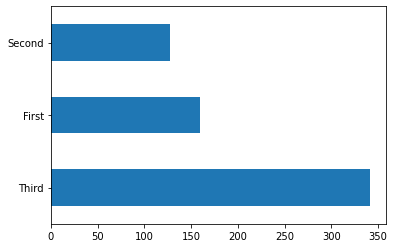

In [100]:
dftrain['class'].value_counts().plot(kind='barh')
# Most passengers are in "Third" class

In [101]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean()#.plot(kind='barh')

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64

Text(0.5, 0, '% survive')

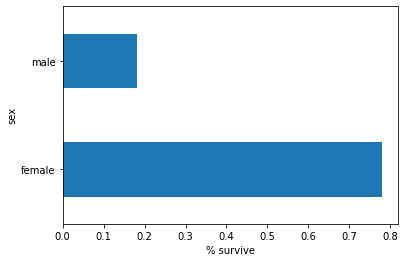

In [102]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
# Females have a much higher chance of survival

In [103]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.value_counts()#.plot(kind='barh') #not so much descriptive

sex     survived
female  1           169
        0            48
male    0           336
        1            74
Name: survived, dtype: int64

Text(0.5, 0, '% survive')

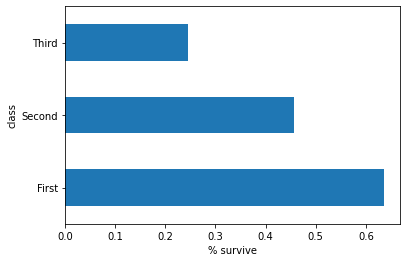

In [104]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')


Text(0.5, 0, '% survive')

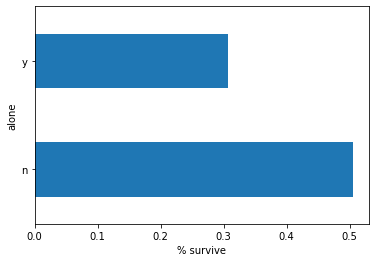

In [105]:
pd.concat([dftrain, y_train], axis=1).groupby('alone').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [106]:
dftrain['alone'].unique()

array(['n', 'y'], dtype=object)

In [107]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [108]:
def make_input_fn(data_df, label_df, num_epochs=30, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

In [109]:
train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [110]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
clear_output()  # clears consoke output

In [111]:
linear_est.train(train_input_fn)
clear_output()  # clears consoke output

In [112]:
result=linear_est.evaluate(eval_input_fn)
clear_output()  # clears consoke output

In [113]:
type(result)

dict

In [114]:
print(result['accuracy'])

0.780303


In [115]:
ans_df=pd.DataFrame(linear_est.predict(eval_input_fn))
clear_output()  # clears consoke output
x=20
print(f"{ans_df.iloc[x]['probabilities'][1]}")
print(f"{dfeval.iloc[x]} survive? {y_eval.iloc[x]}")

0.0962066575884819
sex                          male
age                     -0.617166
n_siblings_spouses              0
parch                           0
fare                    -0.549167
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 20, dtype: object survive? 0


In [116]:
ans_df.head()

,logits,logistic,probabilities,class_ids,classes,all_class_ids,all_classes
0,[-2.706733],[0.06257722],"[0.93742275, 0.062577225]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
1,[-0.106649466],[0.4733629],"[0.52663714, 0.47336286]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
2,[1.1861372],[0.7660495],"[0.2339505, 0.7660495]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
3,[0.4479341],[0.6101479],"[0.38985208, 0.61014795]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
4,[-1.0722208],[0.25498098],"[0.745019, 0.25498098]",[0],[b'0'],"[0, 1]","[b'0', b'1']"


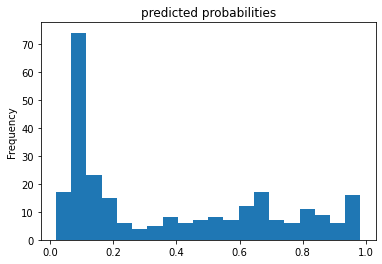

In [117]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
clear_output()  # clears consoke output
probs.plot(kind='hist', bins=20, title='predicted probabilities')